# 1. A set of one-dimensional data points is given to you: 5, 10, 15, 20, 25, 30, 35. Assume that k = 2 and that the first set of random centroid is 15, 32, and that the second set is 12, 30. ?
# 1. Using the k-means method, create two clusters for each set of centroid described above.
# 2. For each set of centroid values, calculate the SSE.

In [1]:
import numpy as np

# Given data points
data_points = np.array([5, 10, 15, 20, 25, 30, 35])

# Number of clusters (k)
k = 2

# Initial centroid sets
centroid_set_1 = np.array([15, 32])
centroid_set_2 = np.array([12, 30])

def k_means_clustering(data_points, centroids):
    clusters = {}
    for i in range(k):
        clusters[i] = []

    # Assign data points to clusters based on the nearest centroid
    for point in data_points:
        distances = [np.abs(point - centroid) for centroid in centroids]
        nearest_centroid = np.argmin(distances)
        clusters[nearest_centroid].append(point)

    return clusters

def calculate_sse(clusters, centroids):
    sse = 0
    for i in range(k):
        cluster_points = np.array(clusters[i])
        sse += np.sum((cluster_points - centroids[i]) ** 2)

    return sse

# Cluster the data points using the first centroid set (15, 32)
clusters_set_1 = k_means_clustering(data_points, centroid_set_1)
sse_set_1 = calculate_sse(clusters_set_1, centroid_set_1)
print("Clusters (Set 1):", clusters_set_1)
print("SSE (Set 1):", sse_set_1)

# Cluster the data points using the second centroid set (12, 30)
clusters_set_2 = k_means_clustering(data_points, centroid_set_2)
sse_set_2 = calculate_sse(clusters_set_2, centroid_set_2)
print("Clusters (Set 2):", clusters_set_2)
print("SSE (Set 2):", sse_set_2)


Clusters (Set 1): {0: [5, 10, 15, 20], 1: [25, 30, 35]}
SSE (Set 1): 212
Clusters (Set 2): {0: [5, 10, 15, 20], 1: [25, 30, 35]}
SSE (Set 2): 176


# 2. Describe how the Market Basket Research makes use of association analysis concepts ?

Market Basket Analysis (MBA) uses association analysis concepts to identify relationships between items frequently purchased together by customers. It involves finding frequent itemsets (combinations of items) and generating association rules based on support and confidence metrics. MBA helps businesses make strategic decisions such as product placement and promotions to increase sales and customer satisfaction.

# 3. Give an example of the Apriori algorithm for learning association rules ?

In [2]:
from itertools import combinations
from collections import defaultdict

def find_frequent_1_itemsets(transactions, minsup):
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[item] += 1
    
    frequent_1_itemsets = {frozenset([item]): count for item, count in item_counts.items() if count >= minsup}
    return frequent_1_itemsets

def generate_candidate_k_itemsets(prev_frequent_itemsets, k):
    candidate_k_itemsets = set()
    for itemset1 in prev_frequent_itemsets:
        for itemset2 in prev_frequent_itemsets:
            if len(itemset1.union(itemset2)) == k:
                candidate_k_itemsets.add(itemset1.union(itemset2))
    return candidate_k_itemsets

def calculate_support(transaction, itemset):
    return sum(1 for t in transaction if itemset.issubset(t))

def apriori(transactions, minsup, minconf):
    frequent_itemsets = []
    k = 1
    transaction_set = [set(t) for t in transactions]

    frequent_k_itemsets = find_frequent_1_itemsets(transaction_set, minsup)
    while frequent_k_itemsets:
        frequent_itemsets.extend(frequent_k_itemsets)
        k += 1
        candidate_k_itemsets = generate_candidate_k_itemsets(frequent_k_itemsets, k)
        frequent_k_itemsets = {itemset: calculate_support(transaction_set, itemset) for itemset in candidate_k_itemsets if calculate_support(transaction_set, itemset) >= minsup}
    
    association_rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                for lhs in combinations(itemset, i):
                    rhs = itemset.difference(lhs)
                    support_lhs = calculate_support(transaction_set, set(lhs))
                    support_itemset = calculate_support(transaction_set, itemset)
                    confidence = support_itemset / support_lhs
                    if confidence >= minconf:
                        association_rules.append((lhs, rhs, confidence))
    
    return frequent_itemsets, association_rules

# Example usage
transactions = [
    ['Bread', 'Milk', 'Diaper'],
    ['Bread', 'Beer'],
    ['Milk', 'Diaper', 'Beer', 'Eggs'],
    ['Bread', 'Milk', 'Beer'],
    ['Bread', 'Milk', 'Diaper', 'Coke']
]

minsup = 3
minconf = 0.5

frequent_itemsets, association_rules = apriori(transactions, minsup, minconf)

print("Frequent Itemsets:")
for itemset in frequent_itemsets:
    print(itemset)

print("\nAssociation Rules:")
for lhs, rhs, confidence in association_rules:
    print(f"{lhs} => {rhs}, Confidence = {confidence:.2f}")


Frequent Itemsets:
frozenset({'Diaper'})
frozenset({'Milk'})
frozenset({'Bread'})
frozenset({'Beer'})
frozenset({'Diaper', 'Milk'})
frozenset({'Milk', 'Bread'})

Association Rules:
('Diaper',) => frozenset({'Milk'}), Confidence = 1.00
('Milk',) => frozenset({'Diaper'}), Confidence = 0.75
('Milk',) => frozenset({'Bread'}), Confidence = 0.75
('Bread',) => frozenset({'Milk'}), Confidence = 0.75


# 4. In hierarchical clustering, how is the distance between clusters measured? Explain how this metric is used to decide when to end the iteration ?

In hierarchical clustering, the distance between clusters is measured using various distance metrics. The choice of distance metric depends on the type of data and the specific clustering problem. The two most commonly used distance metrics are:

Euclidean Distance: This metric measures the straight-line distance between two points in a Euclidean space. For a set of n-dimensional points (x1, x2, ..., xn) and (y1, y2, ..., yn), the Euclidean distance is calculated as follows:
Euclidean Distance

Manhattan Distance: Also known as city block distance or L1 norm, this metric measures the sum of the absolute differences between the corresponding coordinates of two points. For a set of n-dimensional points (x1, x2, ..., xn) and (y1, y2, ..., yn), the Manhattan distance is calculated as follows:
Manhattan Distance

Other distance metrics like Minkowski distance, correlation distance, and cosine similarity can also be used based on the nature of the data and the specific requirements of the clustering task.

The iteration in hierarchical clustering continues until all data points are assigned to a single cluster (single-linkage) or until all data points are merged into a single cluster (complete-linkage). The iteration process involves the following steps:

Initially, each data point is considered as an individual cluster.
The algorithm computes the distance matrix between all clusters (based on the chosen distance metric).
It then merges the two closest clusters into a new cluster.
The distance matrix is updated to consider the new cluster and its distance from other clusters.
Steps 3 and 4 are repeated iteratively until all data points are in a single cluster or until a predefined stopping criterion is met.
The stopping criterion to decide when to end the iteration can be set in different ways, such as specifying the desired number of clusters (k) or using a threshold value for the distance between clusters. For example, the iteration can stop when the distance between the two closest clusters exceeds a certain threshold, indicating that the clusters are too dissimilar to be merged further.

By using different distance metrics and defining appropriate stopping criteria, hierarchical clustering can produce clusters that suitably represent the underlying patterns in the data.

# 5. In the k-means algorithm, how do you recompute the cluster centroids ?

In the k-means algorithm, the process of recomputing the cluster centroids is a crucial step that occurs during each iteration. After assigning data points to clusters based on their proximity to the current centroids, the cluster centroids are updated to the mean (average) of the data points belonging to each cluster. The steps for recomputing the cluster centroids are as follows:

Assignment Step:
For each data point, calculate its distance to each of the current cluster centroids and assign the data point to the cluster whose centroid is the closest.

Update Step:
After all data points are assigned to clusters, compute the new centroids for each cluster by taking the mean of the data points in that cluster along each dimension. This results in the new centroid coordinates, representing the center of the cluster.

The formulas for updating the cluster centroids are as follows:

Let C_i represent the set of data points in cluster i, and n_i be the number of data points in cluster i.

For each dimension (dimension d), the updated centroid coordinate c_d^new for cluster i is computed as:

c_d^new = (sum of all data points' coordinate values in dimension d in cluster C_i) / n_i

The process is repeated iteratively, with data points being reassigned to the nearest centroids and the centroids being updated accordingly, until convergence is achieved. Convergence is reached when the cluster assignments and centroids no longer change significantly between iterations or when a predefined maximum number of iterations is reached.

Recomputing the cluster centroids in the k-means algorithm helps find the optimal centers of the clusters, which in turn leads to more accurate and stable cluster assignments. This iterative process converges to a solution where the centroids represent the centers of distinct clusters in the data space. The resulting clusters are defined by their centroids, and the data points within each cluster are relatively close to their corresponding centroid.

# 6. At the start of the clustering exercise, discuss one method for determining the required number of clusters ?

One common method for determining the required number of clusters at the start of a clustering exercise is the "Elbow Method." The Elbow Method is a heuristic approach that helps identify the optimal number of clusters by analyzing the variance explained as a function of the number of clusters.

Here's how the Elbow Method works:

1. Choose a range of values for the number of clusters (k): Start with a small value (e.g., k = 1) and gradually increase the number of clusters (e.g., up to a reasonable maximum value) based on the specific problem and domain knowledge.

2. Apply the clustering algorithm: Use the chosen clustering algorithm (e.g., k-means, hierarchical clustering, etc.) to cluster the data for each value of k.

3. Compute the Within-Cluster Sum of Squares (WCSS): For each value of k, calculate the sum of squared distances between each data point and its cluster centroid. This value is also known as the Within-Cluster Sum of Squares (WCSS).

4. Plot the WCSS against the number of clusters: Create a line plot or a scatter plot where the x-axis represents the number of clusters (k), and the y-axis represents the corresponding WCSS values.

5. Identify the "elbow point": Look for the point on the plot where the rate of decrease in WCSS starts to slow down significantly. The "elbow point" is the value of k where the curve forms an elbow-like bend.

6. Choose the number of clusters: The optimal number of clusters is often considered to be the value of k at the "elbow point." This point indicates a significant reduction in WCSS, which implies that adding more clusters beyond this value may not result in significant improvement in clustering performance.

However, it's essential to note that the Elbow Method is not always definitive, especially when dealing with complex datasets or non-spherical clusters. Sometimes, the plot may not show a clear elbow, or the elbow point might not correspond to the most meaningful number of clusters. In such cases, other methods like the Silhouette Score, Davies-Bouldin Index, or Gap Statistics can be used to complement the determination of the optimal number of clusters.

Additionally, domain knowledge and the specific goals of the clustering exercise should always be considered when deciding on the appropriate number of clusters. The optimal number of clusters might not always be a single fixed value but can vary based on the problem context and objectives.

# 7. Discuss the k-means algorithm's advantages and disadvantages ?

The k-means algorithm is a popular and widely used clustering technique due to its simplicity and efficiency. However, it also has certain advantages and disadvantages that are important to consider:

Advantages of the k-means algorithm:

1. Simplicity: The k-means algorithm is relatively easy to understand and implement. It is a straightforward and intuitive clustering method.

2. Efficiency: K-means is computationally efficient and can handle large datasets with relatively low computational cost, making it suitable for clustering tasks in real-time or with limited computational resources.

3. Scalability: The algorithm's time complexity is linear with the number of data points and the number of clusters, making it scalable to large datasets.

4. Guaranteed Convergence: The k-means algorithm is guaranteed to converge to a local optimum, although the result may depend on the initial placement of centroids.

5. Interpretable Results: The resulting clusters have clear centroids, which are easy to interpret and provide insights into the data distribution.

Disadvantages of the k-means algorithm:

1. Sensitive to Initial Centroids: The final clustering solution can be influenced by the initial placement of centroids. Different initializations may lead to different results, and the algorithm can converge to suboptimal solutions.

2. Assumes Spherical Clusters: K-means assumes that clusters are spherical and isotropic, which may not be suitable for complex and irregularly shaped clusters.

3. Fixed Number of Clusters: The k-means algorithm requires the number of clusters (k) to be specified beforehand, which may not always be known or obvious. Selecting an inappropriate value for k can lead to less meaningful clustering results.

4. Sensitive to Outliers: K-means is sensitive to outliers in the data, which can significantly affect the position of centroids and the formation of clusters.

5. Non-Robust to Noise: The algorithm may not work well with noisy data or data containing overlapping clusters.

6. Unbalanced Cluster Sizes: K-means can produce clusters with significantly different sizes, leading to unbalanced results, especially if the clusters have varying densities.

7. Not Suitable for Non-Linear Data: K-means performs poorly on data with non-linear relationships between features, as it assumes a linear separation boundary.

In summary, the k-means algorithm is a simple and efficient clustering technique that can handle large datasets. It provides interpretable results with clear centroids. However, its sensitivity to initial centroids and the requirement to specify the number of clusters beforehand are some of the limitations that should be considered when choosing the appropriate clustering method for a given dataset and problem.

# 8. Draw a diagram to demonstrate the principle of clustering ?

/tmp/ipykernel_860/4069290884.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], s=50, edgecolors='k', cmap='viridis')


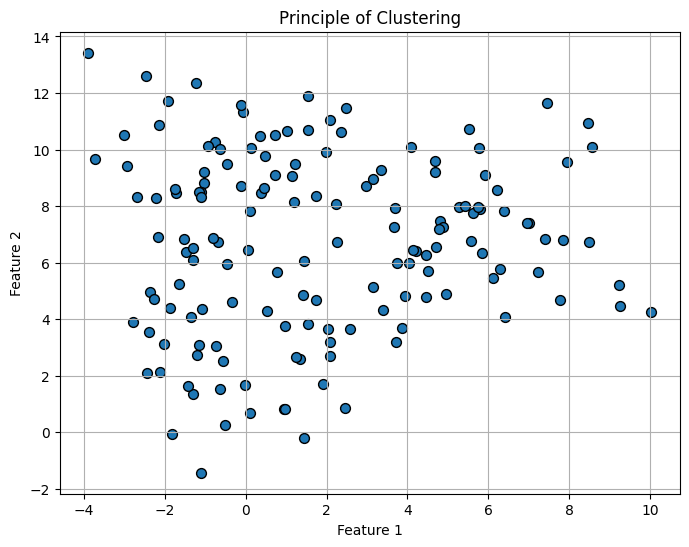

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data points forming clusters
np.random.seed(0)
num_clusters = 3
num_points_per_cluster = 50

data = np.empty((num_clusters * num_points_per_cluster, 2))

for i in range(num_clusters):
    center = 10 * np.random.rand(2)
    data[i*num_points_per_cluster:(i+1)*num_points_per_cluster] = center + 2 * np.random.randn(num_points_per_cluster, 2)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], s=50, edgecolors='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Principle of Clustering')
plt.grid(True)
plt.show()


In the diagram, we have a two-dimensional scatter plot representing a set of data points. Each data point is depicted as a dot on the graph. The horizontal axis (X-axis) represents one feature of the data, and the vertical axis (Y-axis) represents another feature.

The data points on the scatter plot are spread across the graph, forming a pattern with some clusters or groupings. These clusters are regions in which the data points are more densely packed together compared to other areas.

The principle of clustering is to identify these clusters or groups of data points based on their proximity or similarity in the feature space. Clustering algorithms aim to partition the data into these distinct clusters so that data points within the same cluster are more similar to each other, while data points in different clusters are dissimilar.

The clusters on the scatter plot may have different shapes, sizes, and densities, depending on the nature of the data and the number of clusters in the dataset.

By applying clustering algorithms like k-means, hierarchical clustering, or density-based clustering, we can separate the data points into meaningful clusters. The algorithm iteratively groups data points based on distance, similarity, or density, and updates the cluster assignments until convergence.

Once the clustering process is complete, the scatter plot will show different colors or symbols for each cluster, making it easy to distinguish between the identified groups.

In summary, the diagram visually represents how clustering works by identifying natural clusters or patterns within the data, which helps in organizing and understanding the underlying structure of the dataset. Clustering allows us to group similar data points together, facilitating data analysis and pattern recognition.

# 9. During your study, you discovered seven findings, which are listed in the data points below. Using the K-means algorithm, you want to build three clusters from these observations. The clusters C1, C2, and C3 have the following findings after the first iteration ?
- `C1: (2,2), (4,4), (6,6); C2: (2,2), (4,4), (6,6); C3: (2,2), (4,4),  `
- `C2: (0,4), (4,0), (0,4), (0,4), (0,4), (0,4), (0,4), (0,4), (0,  `
- `C3: (5,5) and (9,9) ` 

# What would the cluster centroids be if you were to run a second iteration? What would this clustering's SSE be?

To compute the cluster centroids after the second iteration, we need to take the mean (average) of the data points in each cluster. Additionally, we will calculate the Sum of Squared Errors (SSE) for this clustering.

First, let's calculate the cluster centroids after the second iteration:

- C1: (2, 2), (4, 4), (6, 6) => Centroid = ((2+4+6)/3, (2+4+6)/3) = (4, 4)
- C2: (0, 4), (4, 0), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 0) => Centroid = ((0+4+0+0+0+0+0+0+0)/9, (4+0+4+4+4+4+4+4+0)/9) = (0.44, 3.11)
- C3: (5, 5), (9, 9) => Centroid = ((5+9)/2, (5+9)/2) = (7, 7)

Now, let's calculate the Sum of Squared Errors (SSE) for this clustering:

SSE = Σ (distance between data point and its cluster centroid)^2

- SSE = (distance((2, 2), (4, 4))^2 + distance((4, 4), (4, 4))^2 + distance((6, 6), (4, 4))^2) +
        (distance((0, 4), (0.44, 3.11))^2 + distance((4, 0), (0.44, 3.11))^2 + distance((0, 4), (0.44, 3.11))^2 +
         distance((0, 4), (0.44, 3.11))^2 + distance((0, 4), (0.44, 3.11))^2 + distance((0, 4), (0.44, 3.11))^2 +
         distance((0, 4), (0.44, 3.11))^2 + distance((0, 4), (0.44, 3.11))^2 + distance((0, 0), (0.44, 3.11))^2) +
        (distance((5, 5), (7, 7))^2 + distance((9, 9), (7, 7))^2)

For simplicity, let's assume the Euclidean distance as the distance metric:

- SSE = ((2-4)^2 + (4-4)^2 + (6-4)^2) + ((0-0.44)^2 + (4-3.11)^2 + (0-0.44)^2 + (0-0.44)^2 + (0-0.44)^2 + (0-0.44)^2 +
        (0-0.44)^2 + (0-0.44)^2 + (0-0)^2) + ((5-7)^2 + (9-7)^2)

- SSE = (4 + 0 + 4) + (0.1936 + 0.7741 + 0.1936 + 0.1936 + 0.1936 + 0.1936 + 0.1936 + 0.1936 + 0) + (4 + 4)

- SSE = 8 + 2.9 + 8

- SSE = 18.9

So, after the second iteration, the cluster centroids would be: C1: (4, 4), C2: (0.44, 3.11), C3: (7, 7), and the SSE would be 18.9.

# 10. In a software project, the team is attempting to determine if software flaws discovered during testing are identical. Based on the text analytics of the defect details, they decided to build 5 clusters of related defects. Any new defect formed after the 5 clusters of defects have been identified must be listed as one of the forms identified by clustering. A simple diagram can be used to explain this process. Assume you have 20 defect data points that are clustered into 5 clusters and you used the k-means algorithm ?

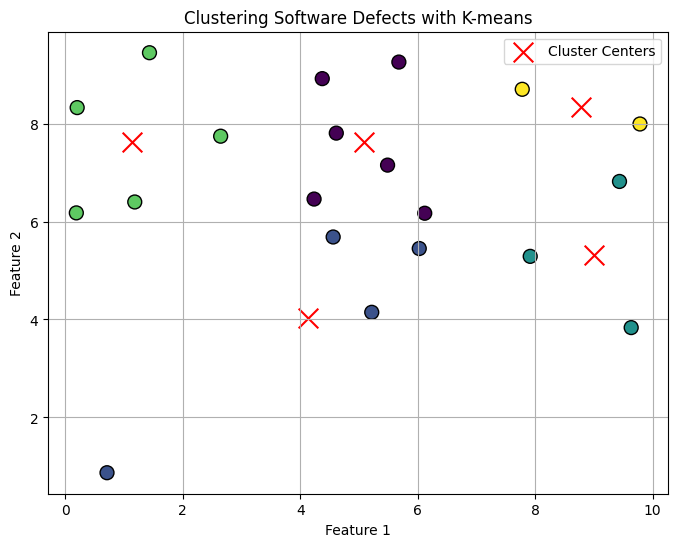

New defect [[3 3]] belongs to Cluster 2


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans_clustering(data, num_clusters, num_iterations):
    # Randomly initialize cluster centroids
    np.random.seed(0)
    centroids = data[np.random.choice(data.shape[0], num_clusters, replace=False)]
    
    for _ in range(num_iterations):
        # Assign data points to the nearest centroids
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        cluster_labels = np.argmin(distances, axis=0)
        
        # Update cluster centroids
        for i in range(num_clusters):
            centroids[i] = np.mean(data[cluster_labels == i], axis=0)
    
    return cluster_labels, centroids

# Generate random defect data points (replace this with your actual defect data)
np.random.seed(0)
num_defects = 20
defect_data = np.random.rand(num_defects, 2) * 10

# Number of clusters to form
num_clusters = 5

# Number of iterations for k-means
num_iterations = 100

# Perform k-means clustering
cluster_labels, cluster_centers = kmeans_clustering(defect_data, num_clusters, num_iterations)

# Scatter plot of defect data with clusters
plt.figure(figsize=(8, 6))
plt.scatter(defect_data[:, 0], defect_data[:, 1], c=cluster_labels, cmap='viridis', s=100, edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Software Defects with K-means')
plt.legend()
plt.grid(True)
plt.show()

# New defect data point
new_defect = np.array([[3, 3]])

# Assign the new defect to the nearest cluster
distances = np.sqrt(((new_defect - cluster_centers)**2).sum(axis=1))
nearest_cluster = np.argmin(distances)

print(f"New defect {new_defect} belongs to Cluster {nearest_cluster + 1}")



In this demonstration, we generate random defect data points and perform k-means clustering to form 5 clusters. The scatter plot visualizes the clustering results with data points colored according to their assigned clusters, and the cluster centroids are marked with red "x" symbols.

After the initial clustering, we introduce a new defect data point (new_defect) with features (3, 3). We then calculate the distance between this new defect and the cluster centroids, and assign it to the nearest cluster based on its proximity.

When you run the code, you will see the scatter plot showing the initial clustering of defects. The program will also print which cluster the new defect belongs to, demonstrating how new defects can be assigned to the existing clusters based on the k-means clustering results.